## TensorFlow

TensorFlow是一个功能强大的数字计算开源软件库，特别适合和微调大规模机器学习。它的基本原理很简单：**首先在Python中定义要执行的计算图（例如，图9-1中的图），然后TensorFlow采用该图并使用优化的C ++代码高效运行它**。
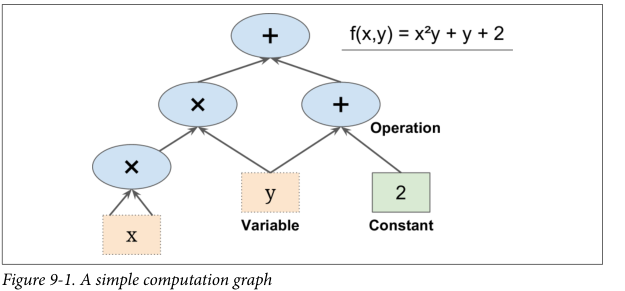

最重要的是，**可以将图形分成几个块并在多个CPU或GPU上并行运行**（如图9-2所示）。TensorFlow还支持分布式计算，因此你可以通过将计算分成数百台服务器，在合理的时间内在庞大的训练集上训练庞大的神经网络（参见第12章）。 TensorFlow可以在由数十亿个实例组成的训练集上训练具有数百万个参数的网络，每个实例具有数百万个特征。这应该不足为奇，因为TensorFlow是由Google Brain团队开发的，它支持Google的许多大型服务，例如Google Cloud Speech，Google Photos和Google Search。
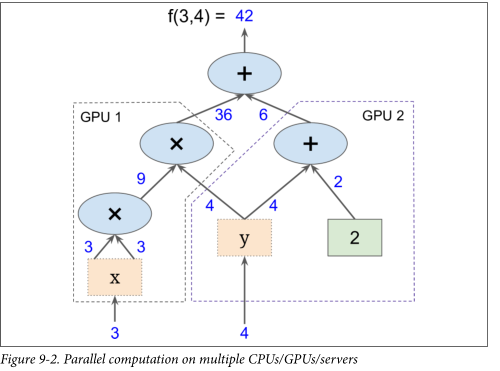


当TensorFlow于2015年11月开源时，已经有很多用于深度学习的流行开源库（表9-1列出了几个），并且公平地说，TensorFlow的大多数功能已经存在于一个库或另一个库中。尽管如此，TensorFlow的简洁设计，可扩展性，灵活性，1和出色的文档（更不用说谷歌的名字）迅速将其提升到了榜单的首位。简而言之，TensorFlow的设计灵活，可扩展，并且可以投入生产，现有的框架可以说只占其中三个中的两个。以下是TensorFlow的一些亮点：

- 它不仅可以在Windows，Linux和macOS上运行，还可以在移动设备上运行，包括iOS和Android

- 它提供了一个非常简单的Python API，名为**TF.Learn** （tensorflow.contrib.learn），与Scikit-Learn兼容。正如你将看到的，你可以使用它在几行代码中训练各种类型的神经网络。它以前是一个名为Scikit Flow（或skflow）的独立项目。

- 它还提供了另一个名为TF-slim（tensorflow.contrib.slim）的简单API，以简化神经网络的构建，训练和评估。

- 在TensorFlow之上独立构建了其他几个高级API，例如Keras或Pretty Tensor。

- 它的主要Python API提供了更大的灵活性（以更高的复杂性为代价）来创建各种计算，包括你能想到的任何神经网络架构。

- 它包括许多ML操作的高效C ++实现，特别是那些构建神经网络所需的操作。还有一个C ++ API来定义你自己的高性能操作。

- 它提供了几个高级优化节点搜索参数来最小化成本函数。这些非常易于使用，因为TensorFlow会自动负责计算你定义的函数的梯度。这称为automatic differentiating (or autodiff)。

- 它还带有一个名为TensorBoard的强大可视化工具，可以让你使用浏览计算图，查看学习曲线等。

- Google还推出了云服务来运行TensorFlow图表。

- 最后，它拥有一支热情且乐于助人的开发人员团队，和一个不断发展的社区有助于改善它。 它是GitHub上最受欢迎的开源项目之一，并且正在建立越来越多的优秀项目（例如，查看(https//www.tensorflow.org/) 上的资源页面，或 (https//github.com/jtoy/awesome-tensorflow). 要询问技术问题，你应该使用(http://stackoverflow.com/)并使用“tensorflow”标记你的问题。 你可以通过GitHub提交错误和功能请求。 有关一般性讨论，请加入Google群组。


在本章中，我们将介绍TensorFlow的基础知识，从安装到创建，运行，保存和可视化简单的计算图。 在构建第一个神经网络之前掌握这些基础知识非常重要（我们将在下一章中介绍）。

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "F:\ML\Machine learning\Hands-on machine learning with scikit-learn and tensorflow"
CHAPTER_ID = "09_Up and Running with TensorFlow"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## 1. Installation

TensorFlow的具体安装已经超出这份笔记的范围，有很多途径可以查到安装指南，比如TensorFlow的官网或者国内的CSDN,简书等等。

## 2. Creating Your First Graph and Running It in a Session

以下代码创建了图9-1中所示的图：

In [2]:
import tensorflow as tf

x = tf.Variable(3,name="x")
y = tf.Variable(4,name="y")
f = x*x*y +y+2

最重要的是要了解这段代码，实际上并没有执行任何计算，即使它看起来像它（特别是最后一行）。它只是创建一个计算图。 实际上，即使变量还没有初始化。 要评估此图，你需要打开**TensorFlow会话**并使用它来初始化变量并评估 **f**。TensorFlow会话负责将操作放置到CPU和GPU等设备上并运行它们，并保存所有变量值。

以下代码**创建会话**，初始化变量并进行评估，然后 **f** 关闭会话（释放资源）：

In [3]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [4]:
sess.close()

不得不一直重复sess.run（）有点麻烦，但幸运的是有更好的方法：

In [5]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [6]:
result

42

在with块内，会话被设置为默认会话。
- 调用**x.initializer.run()**等同于调用 **tf.get_default_session().run(x.initializer)**，

- 调用**f.eval()**等同于调用 **tf.get_default_session().run(f)**。

这使代码更容易阅读。 此外，**会话在块结束时自动关闭**。

你可以使用**global_variables_initializer()函数**,而不是为每个变量手动运行初始化程序。
**请注意，它实际上不会立即执行初始化，而是在图中创建一个节点，该节点将在运行时初始化所有变量**：

In [7]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()# actually initialize all the variables
    result = f.eval()

**在Jupyter内部或在Python shell中**，你可能更喜欢创建一个**InteractiveSession**。与常规会话的唯一区别是，当创建InteractiveSession时，它会自动将自己设置为默认会话，因此你不需要 **with**语句块（**但是你需要在完成后手动关闭会话**）：

In [8]:
init = tf.global_variables_initializer()

In [9]:
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)

42


In [10]:
sess.close()

In [11]:
result

42

TensorFlow程序通常分为两部分：

* **第一部分构建计算图（这称为构造阶段），构建阶段通常构建表示ML的模型和训练它所需计算的计算图**。
* **第二部分运行它（这是执行阶段），执行阶段通常运行循环，该循环重复评估训练步骤（例如，每个小批量一步），逐渐改进模型参数**。 

我们将很快介绍一个例子。

## 3. Managing Graphs

你创建的任何**节点**都会自动添加到默认图表中：

In [12]:
reset_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

在大多数情况下，这很好，但有时**你可能想要管理多个独立的图表**。你可以通过**创建一个新图表并暂时将其作为with块内的默认图表**来完成此操作，如下所示：

In [13]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
    
x2.graph is graph


True

In [14]:
x2.graph is tf.get_default_graph()

False

**在Jupyter（或Python shell）中**，在你进行实验时，通常会多次运行相同的命令。 因此，**你最终可能会得到一个包含许多重复节点的默认图表**。

* 一种解决方案是重新启动Jupyter内核（或Python shell），
* 但更方便的解决方案是通过运行**tf.reset_default_graph（）重置默认图表**

## 4. Lifecycle of a Node Value

**评估节点时，TensorFlow自动确定它所依赖的节点集，并首先评估这些节点**。

例如，请考虑以下代码：

In [15]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x*3

with tf.Session() as sess:
    y_val,z_val = sess.run([y,z])
    print(y.eval()) # 10
    print(z.eval()) # 15

10
15


* 首先，此代码定义了一个非常简单的图形。

* 然后它启动一个会话并运行图形来评估 **y**：TensorFlow自动检测 **y** 取决于 **w**，而 **w** 取决于 **x**，因此它首先计算 **w** ，然后是 **x**，然后是 **y**，并返回 **y** 的值。

* 最后，代码运行图表来评估 **z**。

再一次，TensorFlow检测到它必须首先评估 **w** 和 **x**。重要的是要注意它不会重用先前对 **w** 和 **x**的评估结果。简而言之，前面的代码评估 **w** 和 **x**两次。

图表运行其间删除所有节点值，除了变量值之外，变量值由会话通过图运行维护（队列和读者也保持某种状态，我们将在第12章中看到）。
变量在运行初始化程序时开始运行，并在会话关闭时结束。

在前面的代码中，如果你想有效地评估 **y** 和 **z**，而不是评估 **w** 和 **x**两次，你必须要求TensorFlow在一次图表运行中评估 **y** 和 **z**，如下面的代码所示：

In [16]:
with tf.Session() as sess:
    y_val,z_val = sess.run([y,z])
    print(y_val) # 10
    print(z_val) # 15

10
15


* **在单进程TensorFlow中**，多个会话不共享任何状态，即使它们重复使用相同的图形（每个会话都有自己的每个变量的副本）。
* **在分布式TensorFlow中**（参见第12章），变量状态存储在服务器上，而不是存储在会话中，因此多个会话可以共享相同的变量。

## 5. Linear Regression with TensorFlow

TensorFlow操作（也简称为**ops**）可以接受任意数量的输入和产生任意数量的输出。例如，
* 加法和乘法运算每个都需要两个输入并产生一个输出。
* 常量和变量不需要输入（它们被称为**源操作**）。
* 输入和输出是多维数组，称为**张量**（因此称为“张量流”）。

就像NumPy数组一样，张量具有类型和形状。实际上，**在Python API中，张量只是由NumPy ndarrays表示**。它们通常包含浮点数，但你也可以使用它们来携带字符串（任意字节数组）。

在到目前为止的示例中，张量只包含一个标量值，但你当然可以对任何形状的数组执行计算。例如，以下代码操作2D数组以对California住房数据集执行**线性回归**（在第2章中介绍）。

* 它首先获取数据集;
* 然后它为所有训练实例添加了一个**额外的偏置输入特征**($x_0 = 1$)（它使用NumPy这样做，因此它立即运行）;
* 最后它创建两个TensorFlow常量节点 X 和 y 来保存这些数据和目标，它使用TensorFlow提供的一些矩阵运算来定义**theta**。

这些矩阵函数—**transpose()，matmul()和matrix_inverse()** —是一目了然的，但通常它们不会立即执行任何计算;相反，
* 他们在图表中创建节点，在运行图表时执行它们。你可以认识到 $θ$ 的定义对应于法线方程($θ= X^T·X^{-1}·X^T·y $；见第4章)。
* 最后，代码创建一个会话并使用它来评估**theta**

In [17]:
import numpy as np
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()

In [18]:
theta_value

array([[-3.7465141e+01],
       [ 4.3573415e-01],
       [ 9.3382923e-03],
       [-1.0662201e-01],
       [ 6.4410698e-01],
       [-4.2513184e-06],
       [-3.7732250e-03],
       [-4.2664889e-01],
       [-4.4051403e-01]], dtype=float32)

与使用NumPy直接计算Normal Equation相比，这段代码的主要好处是，TensorFlow会自动在你的GPU卡上运行它，如果你有一个的话（当然，如果你安装了TensorFlow并支持GPU;有关详细信息，请参阅第12章）。

与纯NumPy比较：

In [20]:
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_numpy)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


与 Scikit-Learn比较

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1, 1))

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


## 6. Implementing Gradient Descent

让我们尝试使用**Batch Gradient Descent**（在第4章中介绍）代替正规方程。 

* 首先，我们将通过手动计算梯度来完成此操作，

* 然后我们将使用TensorFlow的autodiff功能让TensorFlow自动计算梯度，最后我们将使用几个TensorFlow的开箱即用优化器。

使用梯度下降时，**请记住首先对输入特征向量进行标准化很重要，否则训练可能要慢得多**。 你可以使用TensorFlow，NumPy，Scikit-Learn的StandardScaler或你喜欢的任何其他解决方案来完成此操作。 **以下代码假定已经完成了此规范化**。

**梯度下降需要首先缩放特征向量**。 我们可以使用TF来做到这一点，但现在让我们使用Scikit-Learn。

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [22]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


### 6.1 Manually Computing the Gradients

除了一些新元素之外，以下代码应该是相当一目了然的：

* **random_uniform()函数**在图中创建一个节点，该节点将生成包含随机值的张量，给定其形状和值范围，非常类似于NumPy的**rand()函数**。

* assign()函数创建一个节点，为变量赋值。在这种情况下，它实现批量梯度下降步骤：$θ^{(next step)}=θ-η∇_θMSE(θ)$。

* 主循环一遍又一遍地执行训练步骤（**n_epochs**次），并且**每100次迭代打印出当前的均方误差（mse）**。你应该看到**MSE**在每次迭代时都会下降。

In [23]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
##########################################################
gradients = 2/m * tf.matmul(tf.transpose(X), error)
##########################################################

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:# 每100次迭代打印出当前的均方误差（mse）
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.7145004
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555718
Epoch 400 MSE = 0.54881126
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.5396291
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473


In [24]:
best_theta

array([[ 2.0685523 ],
       [ 0.8874027 ],
       [ 0.14401656],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393811],
       [-0.04269556],
       [-0.6614529 ],
       [-0.6375279 ]], dtype=float32)

### 6.2 Using autodiff

前面的代码工作正常，但它需要从成本函数（MSE）数学推导出梯度。在线性回归的情况下，它相当容易，但如果你不得不用深度神经网络做这件事你会很头疼：
这将是乏味和容易出错的。您你可以使用**符号微分-symbolic differentiation**来自动为你找到偏导数的方程，但结果代码不一定非常有效。

要理解原因，请考虑函数

$f(x)= exp(exp(exp(x)))$

如果你知道计算，你可以找出它的导数

$f'(x)= exp(x)×exp(exp(x))×exp(exp(exp(x)))$

如果你单独编码 $f(x)$和$f'(x)$ 并且它们看起来完全一样，你的代码不会像它那样高效。更有效的解决方案是编写一个函数，
* 首先计算:$exp(x)$，
* 然后是:$exp(exp(x))$，
* 然后是:$exp(exp(exp(x)))$，并返回全部三个。

这直接给你 $f(x)$（第三项），你可以将所有三个术语相乘，你就完成了。使用原始的方法，你将不得不调用exp函数九次来计算 $f(x)$和$f'(x)$ 。使用这种方法，你只需要调用它三次。当你的函数由某些任意代码定义时，情况会变得更糟。你能找到计算下列函数的偏导数的方程（或代码）吗？

提示：甚至不要尝试。

与上面的相同，除了**radients = ...** 这一行

你怎么找到以下函数关于a和b的的偏导数呢？

In [30]:
def my_func(a,b):
    z=0
    for i in range(100):
        z = a * np.cos(z+i) + z * np.sin(b-i)
    return z

In [31]:
my_func(0.2,0.3)

-0.21253923284754914

In [32]:
reset_graph()

a = tf.Variable(0.2, name="a")
b = tf.Variable(0.3, name="b")
z = tf.constant(0.0, name="z0")
for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)

grads = tf.gradients(z, [a, b])
init = tf.global_variables_initializer()

让我们计算函数在$ a = 0.2 $和$ b = 0.3 $点的值，以及关于$ a $和$ b $的偏导数：

In [33]:
with tf.Session() as sess:
    init.run()
    print(z.eval())
    print(sess.run(grads))

-0.21253741
[-1.1388495, 0.19671397]


幸运的是，TensorFlow的autodiff功能可以解决：它可以自动有效地为你计算梯度。 只需使用下面这一行替换上一节中Gradient Descent代码中的gradients = ...行，代码将继续正常工作：

gradients = tf.gradients(mse, [theta])[0]

In [25]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [26]:
gradients = tf.gradients(mse, [theta])[0]

In [27]:
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.71450037
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555718
Epoch 400 MSE = 0.54881126
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473
Best theta:
[[ 2.0685523 ]
 [ 0.8874027 ]
 [ 0.14401656]
 [-0.3477088 ]
 [ 0.36178365]
 [ 0.00393811]
 [-0.04269556]
 [-0.66145283]
 [-0.6375278 ]]


**gradients（）函数**采用op（在本例中为mse）和变量列表（在这种情况下只是theta），它创建一个ops列表（每个变量一个）来计算op对每个变量的梯度。
因此，梯度节点将计算的MSE关于$θ$的梯度向量。

自动计算梯度有四种主要方法。它们总结在表9-2中。 TensorFlow使用反向模式自动存储，当存在许多输入和少量输出时，这是理想的情况（高效且准确），如神经网络中的情况。 它只计算 $n$ 个输出中的所有输入+ 1个图形遍历，计算输出的所有偏导数。
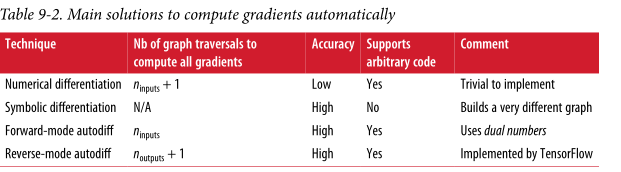

如果你对这些工作感兴趣，请查看附录D.

### 6.3 Using an Optimizer

所以TensorFlow会为你计算梯度。但它变得更加容易：它还提供了许多开箱即用的优化器，包括**Gradient Descent optimizer**。
你可以使用以下代码简单地替换前面的:```gradients = ...```和```training_op = ...```行，并且一切都可以正常工作：
    
```optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)```

```training_op = optimizer.minimize(mse)```    

#### 6.3.1 Using a GradientDescentOptimizer

In [34]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [35]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [36]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.7145004
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555718
Epoch 400 MSE = 0.54881126
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473
Best theta:
[[ 2.0685523 ]
 [ 0.8874027 ]
 [ 0.14401656]
 [-0.3477088 ]
 [ 0.36178365]
 [ 0.00393811]
 [-0.04269556]
 [-0.66145283]
 [-0.6375278 ]]


如果要使用其他类型的优化器，只需更改一行即可。例如，你可以通过像下面这样定义优化器来使用**momentum optimizer**（通常比渐变下降收敛得快得多;参见第11章）：

```optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9)```

#### 6.3.2 Using a momentum optimizer

In [37]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [38]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)

In [39]:
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Best theta:
[[ 2.068558  ]
 [ 0.82962847]
 [ 0.11875335]
 [-0.26554456]
 [ 0.3057109 ]
 [-0.00450249]
 [-0.03932662]
 [-0.8998645 ]
 [-0.8705207 ]]


## 7. Feeding Data to the Training Algorithm

让我们尝试修改以前的代码来实现**Mini-batch Gradient Descent**。为了实现这个，**我们需要一种方法来在每次迭代时用下一个小批量替换 X 和 y**。
最简单的方法是使用**占位符节点**。
* 这些节点是特殊的，因为它们实际上不执行任何计算，它们只是输出你告诉它们在运行时输出的数据。
* 它们通常用于在训练期间将训练数据传递给TensorFlow。
* 如果没有在占位符的运行时指定值，则会出现异常。

要创建占位符节点，必须调用**placeholder（）函数**并指定输出张量的数据类型。或者，如果要强制执行，也可以指定其形状。如果你为**一个维数指定None**，则表示“任意大小”。例如，以下代码

* 创建占位符节点**A**，并且还创建节点 $ B = A + 5$。
* 当我们评估**B**时，我们将**feed_dict**传递给指定**A**值的**eval（）方法**。

注意**A必须具有rank 2（即，它必须是二维的）并且必须有三列（否则引发异常），但它可以有任意数量的行**。

In [40]:
reset_graph()

A = tf.placeholder(tf.float32,shape=(None,3))
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict = {A:[[1,2,3]]})
    B_val_2 = B.eval(feed_dict = {A:[[4,5,6],[7,8,9]]})
    
print(B_val_1)

[[6. 7. 8.]]


In [41]:
print(B_val_2)

[[ 9. 10. 11.]
 [12. 13. 14.]]


你实际上可以提供任何操作给输出，而不仅仅是占位符。在这种情况下，TensorFlow不会尝试评估这些操作; 它使用你提供的值。




### 7.2  Mini-batch Gradient Descent

要实现Mini-batch Gradient Descent，我们只需要稍微调整现有的代码。
* **首先**在构造阶段更改 X 和 y 的定义，使其成为占位符节点：

In [42]:
n_epochs = 1000
learning_rate = 0.01

In [43]:
reset_graph()

X = tf.placeholder(tf.float32,shape =(None, n + 1),name="X" )
y = tf.placeholder(tf.float32,shape = (None, 1),name = "y")

In [44]:
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [45]:
n_epochs = 10

**然后**定义**batch_size**并计算batches总数：

In [46]:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

**最后**，在执行阶段，逐个获取小批量，然后在评估依赖于其中任何一个的节点时，通过**feed_dict参数提供X和y的值**。

In [47]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

In [48]:
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255152],
       [-0.31211877],
       [ 0.38510376],
       [ 0.00434168],
       [-0.0123295 ],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

在评估theta时，我们不需要传递X和y的值，因为它不依赖于它们中的任何一个

## 8. Saving and Restoring Models

训练模型后，应将其参数保存到磁盘，以便随时返回，在其他程序中使用，将其与其他模型进行比较，等等。 此外，你可能希望在训练期间定期保存检查点，这样如果你的计算机在训练期间崩溃，你可以从最后一个检查点继续而不是从头开始。


TensorFlow可以非常轻松地保存和恢复模型。 
* 只需在**构建阶段结束时创建一个Saver节点**（在创建所有变量节点之后）; 
* 然后，在**执行阶段**，只要你想保存模型，只需调用其**save（）方法**，并将其传递给检查点文件的会话和路径：

In [50]:
reset_graph()

n_epochs = 1000                                                                       # not shown in the book
learning_rate = 0.01                                                                  # not shown

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            # not shown
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            # not shown
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      # not shown
error = y_pred - y                                                                    # not shown
mse = tf.reduce_mean(tf.square(error), name="mse")                                    # not shown
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            # not shown
training_op = optimizer.minimize(mse)                                                 # not shown

init = tf.global_variables_initializer()
# 在构建阶段结束时创建一个Saver节点（在创建所有变量节点之后）
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval()) # not shown
            # 调用save() 方法
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")

Epoch 0 MSE = 9.161542
Epoch 100 MSE = 0.7145004
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555718
Epoch 400 MSE = 0.54881126
Epoch 500 MSE = 0.5436363
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473


**恢复模型**同样简单：
* 在构建阶段结束时创建一个Saver，就像之前一样，
* 但是在执行阶段开始时，不是使用init节点初始化变量，而是**调用Saver对象的restore（）方法**：

In [51]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [52]:
np.allclose(best_theta, best_theta_restored)

True

默认情况下，Saver以自己的名义保存和恢复所有变量，但是如果需要更多控制，可以指定要保存或恢复的变量以及要使用的名称。 **例如，以下Saver将仅保存或恢复名称weights下的theta变量：**

如果你想要一个使用不同名称加载和恢复theta的保护程序，例如“weights”：

In [53]:
saver = tf.train.Saver({"weights": theta})

默认情况下，保护程序还将图形结构本身保存在扩展名为.meta的第二个文件中。你可以使用**函数tf.train.import_meta_graph（）来恢复图形结构**。 此函数将图形加载到默认图形中并返回一个Saver，然后可以使用该Saver恢复图形状态（即变量值）：

In [54]:
reset_graph()
# notice that we start with an empty graph.

saver = tf.train.import_meta_graph("/tmp/my_model_final.ckpt.meta")  # this loads the graph structure
theta = tf.get_default_graph().get_tensor_by_name("theta:0") # not shown in the book

with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")  # this restores the graph's state
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [55]:
np.allclose(best_theta, best_theta_restored)

True

这意味着你可以导入预训练模型，而无需使用相应的Python代码来构建图形。当你不断调整和保存模型时，这非常方便：你可以加载以前保存的模型，而无需搜索构建它的代码版本。

## 9. Visualizing the Graph and Training Curves Using TensorBoard

**inside Jupyter**

为了在Jupyter中可视化图形，我们将使用https://tensorboard.appspot.com/ 提供的在线TensorBoard服务器（因此，如果你无法访问Internet，则无法使用）。 据我所知，这段代码最初是由Alex Mordvintsev在他的[DeepDream](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb)教程中编写的。 或者，你可以使用像[tfgraphviz](https://github.com/akimach/tfgraphviz)这样的工具。

In [58]:
from tensorflow_graph_in_jupyter import show_graph

In [59]:
show_graph(tf.get_default_graph())

所以现在我们有一个计算图使用Mini-batch Gradient Descent训练线性回归模型，并且我们定期保存检查点。听起来很复杂，不是吗？然而，我们仍然依靠print（）函数来显示训练过程中的进度。有一种更好的方法：进入**TensorBoard**。
* 如果你提供一些训练统计数据，它将在你的网络浏览器中显示这些统计数据的良好交互式可视化（例如，学习曲线）。

* 你还可以为它提供图形的定义，它将为您提供一个很好的界面来浏览它。这对于识别图中的错误，查找瓶颈等非常有用。

第一步是稍微调整你的程序，以便**编写图形定义和一些训练统计**——例如，训练错误（MSE）——到一个**日志目录**，TensorBoard将从中读取。**每次运行程序时都需要使用不同的日志目录，否则TensorBoard将合并来自不同运行的统计数据**，这会弄乱可视化。**最简单的解决方案是在日志目录名称中包含时间戳**。

**首先**，在**程序开头**添加以下代码：

In [67]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [68]:
n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

**接下来**，在**构建阶段**的最后添加以下代码：

In [69]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

* 第一行在图中创建一个节点，用于评估$MSE$值并写入到TensorBoard兼容的二进制日志字符串，称为**summary**。


* 第二行创建一个FileWriter，你将用它将**summary**写入日志目录中的日志文件。
 
  - 第一个参数表示日志目录的路径（在这种情况下，相对于当前目录，类似于:tf_logs / run-20160906091959 /）。

  - 第二个（可选）参数是你要显示的图形。 创建后，如果日志目录尚不存在（并且需要其父目录），则文件编写器会创建日志目录，并将图形定义写入称为**events file**的二进制日志文件中。

In [70]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

**接着**，你需要**更新执行阶段**以在训练期间**定期评估mse_summary**节点（例如，每10个小批量）。避免在每个训练步骤中记录训练统计数据，因为这会显着减慢训练速度。

这将输出一个**summary**，然后你可以使用**file_writer**将其写入**events file**。 这是更新的代码：

In [71]:
with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()                                                     # not shown


**最后**，你要在程序结束时关闭FileWriter：

In [72]:
file_writer.close()

现在运行这个程序：
* 它将创建日志目录并在此目录中写入事件文件 - events file，其中包含图形定义和MSE值。
* 打开shell并转到工作目录，然后键入:```ls -l tf_logs / run *```以列出日志目录的内容：

```
$ cd $ML_PATH # Your ML working directory (e.g., $HOME/ml)
$ ls -l tf_logs/run*
total 40
-rw-r--r-- 1 ageron staff 18620 Sep 6 11:10 events.out.tfevents.1472553182.mymac
 ```

如果你再次运行该程序，你应该在thetf_logs /目录中看到第二个目录：

现在是时候启动TensorBoard服务器了。如果你创建了virtualenv环境，则需要激活它，然后通过运行tensor board命令启动服务器，将其指向根日志目录。 这将启动TensorBoard Web服务器，侦听端口6006（这是“goog”颠倒过来）：
``` 
$ source env/bin/activate
$ tensorboard --logdir tf_logs/
Starting TensorBoard on port 6006
```
(You can navigate to http://0.0.0.0:6006)

接下来打开浏览器并转到http://0.0.0.0:6006/ （或http：// localhost：6006 /）。
欢迎来到TensorBoard！ 在“事件”选项卡中，你应该在右侧看到MSE。 如果单击它，你将在训练期间看到两次运行时的MSE图（图9-3）。 你可以选中或取消选中要查看的运行，放大或缩小，将鼠标悬停在曲线上以获取详细信息，等等。
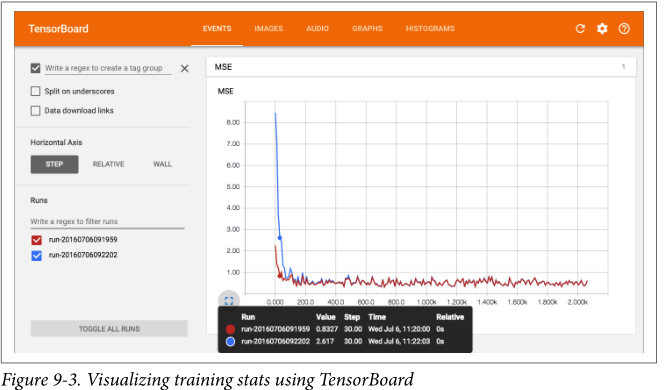

现在单击Graphs选项卡。 你应该看到如图9-4所示的图形。为了减少混乱，具有许多边缘的节点（即与其他节点的连接）分离到右侧的辅助区域（您可以向后移动一个节点）通过右键单击它在主图和辅助区域之间）。默认情况下，图表的某些部分也会折叠。 例如，尝试将鼠标悬停在渐变节点上，然后单击$⊕$图标以展开此子图。 接下来，在此子图中，尝试展开mse_grad子图。
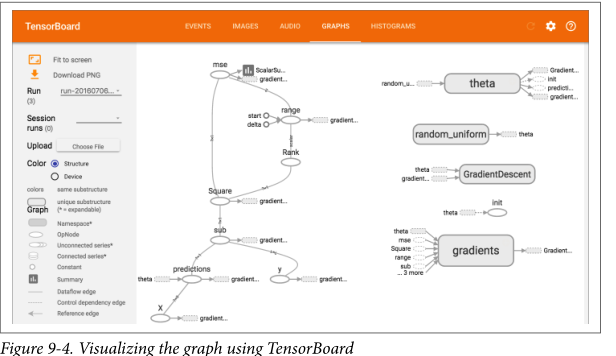

如果您想直接在Jupyter中查看图形，可以使用本章笔记本中提供的show_graph（）函数。它最初由A. Mordvintsev在他的[deepdream tutorial notebook](http://goo.gl/EtCWUc)中编写。 另一种选择是安装E. Jang的[TensorFlow调试工具](https://github.com/ericjang/tdb)，其中包含一个Jupyter扩展图形可视化（以及更多）。

## 10. Name Scopes

**名称范围**
处理更复杂的模型，如神经网络，由于存在千上万个节点，图表很容易变得混乱。为避免这种情况，你可以创建**名称范围**以对相关节点进行分组。 例如，让我们修改前面的代码来定义误差，并在名为“loss”的名称范围内使用 **mse ops**

In [73]:
reset_graph()

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

In [74]:
with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

In [75]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [76]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

file_writer.flush()
file_writer.close()
print("Best theta:")
print(best_theta)

Best theta:
[[ 2.0703337 ]
 [ 0.8637145 ]
 [ 0.12255152]
 [-0.31211877]
 [ 0.38510376]
 [ 0.00434168]
 [-0.0123295 ]
 [-0.83376896]
 [-0.8030471 ]]


范围内定义的每个op的名称现在都以“loss /”为前缀

In [77]:
print(error.op.name)

loss/sub


In [78]:
print(mse.op.name)

loss/mse


In [79]:
reset_graph()

a1 = tf.Variable(0, name="a")      # name == "a"
a2 = tf.Variable(0, name="a")      # name == "a_1"

with tf.name_scope("param"):       # name == "param"
    a3 = tf.Variable(0, name="a")  # name == "param/a"

with tf.name_scope("param"):       # name == "param_1"
    a4 = tf.Variable(0, name="a")  # name == "param_1/a"

for node in (a1, a2, a3, a4):
    print(node.op.name)

a
a_1
param/a
param_1/a


在TensorBoard中，mse和错误节点现在出现在loss命名空间内，默认情况下显示为折叠（图9-5）。
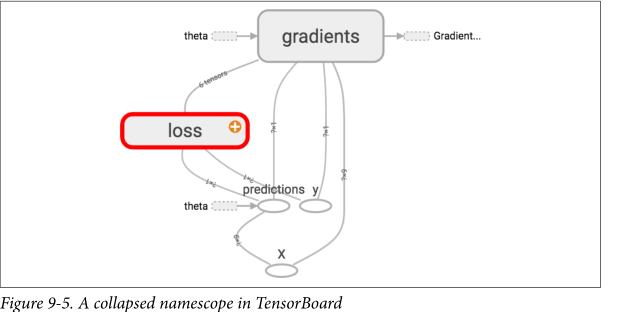

## 11. Modularity

**模块化**

假设你要创建一个图表，添加两个整流线性单位的输出（RELU）。ReLU计算输入的线性函数，如果结果为正则输出结果，否则输出0，如公式9-1所示。
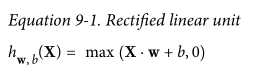

以下代码完成了这项工作，但它非常重复：

**11.1 An ugly flat code**:

In [80]:
reset_graph()

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")

z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w2), b2, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z1, 0., name="relu2")  # Oops, cut&paste error! Did you spot it?

output = tf.add(relu1, relu2, name="output")

这样的重复代码很难维护并且容易出错（事实上，这段代码包含一个剪切和粘贴错误; 你发现了吗？）如果你想再添加一些ReLU，情况会更糟。 幸运的是，TensorFlow让你保持清爽（不要重复自己）：**只需创建一个函数来构建ReLU**。 以下代码创建五个ReLU并输出它们的总和（请注意，**add_n（）**创建一个将计算张量列表总和的操作）：

**11.2 Much better, using a function to build the ReLUs:**

In [81]:
reset_graph()

def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

In [82]:
file_writer = tf.summary.FileWriter("logs/relu1", tf.get_default_graph())

请注意，在创建节点时，TensorFlow检查其名称是否已存在，如果是，则附加下划线后跟索引以使名称唯一。所以
* 第一个ReLU包含名为“weights”，“bias”，“z”和“relu”的节点（加上许多具有默认名称的节点，例如“MatMul”）;
* 第二个ReLU包含名为“weights_1”，“bias_1”的节点，依此类推;
* 第三个ReLU包含名为“weights_2”，“bias_2”的节点，依此类推。 

TensorBoard识别出这样的系列并将它们折叠在一起以减少混乱（如图9-6所示）。

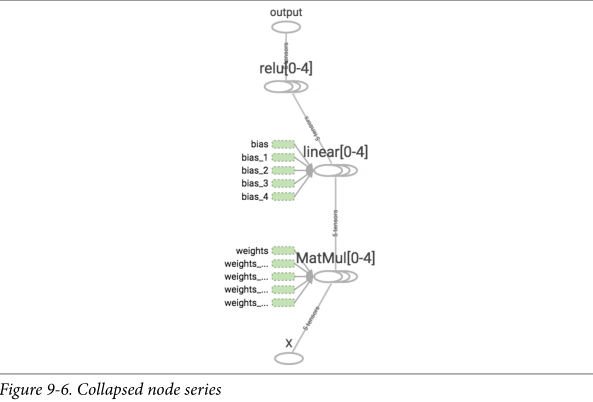

**使用名称范围**，你可以使图表更清晰。只需在名称范围内移动relu（）函数的所有内容即可。图9-7显示了结果图。 请注意，TensorFlow还通过追加_1，_2等来为名称范围指定唯一名称。
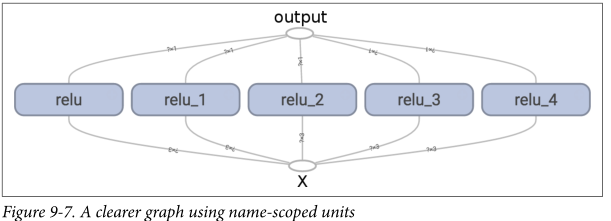

**11.3 Even better using name scopes:**

In [83]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")    # not shown
        b = tf.Variable(0.0, name="bias")                             # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                      # not shown
        return tf.maximum(z, 0., name="max")                          # not shown

In [84]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu2", tf.get_default_graph())
file_writer.close()

## 12. Sharing Variables

**共享变量**

**如果要在图形的各个组件之间共享变量，一个简单的选择（传统方法）是首先创建它，然后将其作为参数传递给需要它的函数**。
例如，假设你要控制ReLU阈值（当前硬编码为0）使用共享阈值变量用于所有ReLU。你可以
* 先创建该变量，
* 然后将其传递给relu（）函数：

以传统方法分享阈值变量，通过在relu（）函数之外定义它然后将其作为参数传递：

In [85]:
reset_graph()

def relu(X, threshold):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

threshold = tf.Variable(0.0, name="threshold")
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name="output")

这很好用：现在，你可以使用阈值变量控制所有ReLU的阈值。但是，**如果存在许多共享参数（例如此参数），则必须始终将它们作为参数传递将是很痛苦的**。
* 一些人创建一个包含模型中所有变量的Python字典，并将其传递给每个函数。
* 另一些人为每个模块创建一个类（例如，使用类变量来处理共享参数的ReLU类）。

另一种选择是**在第一次调用时将共享变量设置为relu（）函数的属性**，如下所示：

In [86]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu, "threshold"):
            relu.threshold = tf.Variable(0.0, name="threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, relu.threshold, name="max")

In [87]:
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

TensorFlow提供了另一种选择，可能会导致更干净和比以前的解决方案更模块化的代码。 这个解决方案起初有点难以理解，但由于它在TensorFlow中被大量使用，因此值得深入了解一下。我们的想法是
* **使用get_variable（）函数创建共享变量（如果它尚不存在），或者如果它已经存在则重复使用它**。

* 所需的操作（创建或重用）由当前**variable_scope（）的属性**控制。 例如，以下代码将创建一个名为**“relu / threshold”的变量**（作为标量，因为shape =（），并使用0.0作为初始值）：

In [88]:
reset_graph()

with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))

请注意，如果先前调用get_vari able（）已创建变量，则此代码将引发异常。此行为可防止错误地重用变量。如果要重用变量，则需要通过将变量范围的重用属性设置为True来明确说明（在这种情况下，你不必指定形状或初始化程序）：

In [89]:
with tf.variable_scope("relu", reuse=True):
    threshold = tf.get_variable("threshold")

此代码将获取现有的**“relu / threshold”变量**，如果它不存在或者不是使用get_variable（）创建的，则引发异常。或者，你可以通过调用scope的**reuse_variables（）**方法将块中的reuse属性设置为True：

In [90]:
with tf.variable_scope("relu") as scope:
    scope.reuse_variables()
    threshold = tf.get_variable("threshold")

* **一旦重用设置为True，则无法在块内将其设置回False**。 
* 此外，如果你在此范围内定义其他变量范围，它们将自动继承reuse = True。 
* 最后，**只有get_variable（）创建的变量才能以这种方式重用**。

现在，你拥有了使relu（）函数访问阈值变量所需的所有部分，而无需将其作为参数传递：

In [91]:
reset_graph()

def relu(X):
    with tf.variable_scope("relu", reuse=True):
        threshold = tf.get_variable("threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
relus = [relu(X) for relu_index in range(5)]
output = tf.add_n(relus, name="output")

此代码

* 首先定义 **relu（）函数**，

* 然后创建 **relu / threshold变量**（作为稍后将被初始化为0.0的标量）并**通过调用来构建五个ReLUrelu（）函数**。

* relu（）函数重用**relu / threshold变量，并创建其他ReLU节点**。

In [92]:
file_writer = tf.summary.FileWriter("logs/relu6", tf.get_default_graph())
file_writer.close()

* 使用get_variable（）创建的变量始终使用其variable_scope的名称作为前缀命名（例如，“relu / thres hold”），
* 但是对于所有其他节点（包括使用tf.Variable（）创建的变量）变量作用域的作用类似于新名称作用域。
* 特别是，如果已创建具有相同名称的名称范围，则会添加后缀以使名称唯一。

例如，在前面的代码中创建的所有节点（阈值变量除外）都有一个前缀为“relu_1 /”到“relu_5 /”的名称，如图9-8所示。
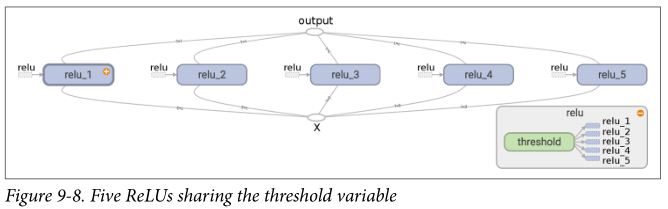

不幸的是必须在relu（）函数之外定义阈值变量，其中所有其余的ReLU代码都驻留在其中。要解决此问题，以下代码**在第一次调用时在relu（）函数中创建阈值变量**，然后在后续调用中重用它。

现在relu（）函数不必担心名称范围或变量共享：
* 它只调用get_variable（），它将创建或重用阈值变量（它不需要知道是哪种情况）。
* 其余的代码调用relu（）五次，确保在**第一次调用时设置 reuse = False**，并**对其他调用reuse = True**。

In [93]:
reset_graph()

def relu(X):
    with tf.variable_scope("relu"):
        threshold = tf.get_variable("threshold", shape=(), initializer=tf.constant_initializer(0.0))
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("", default_name="") as scope:
    first_relu = relu(X)     # create the shared variable
    scope.reuse_variables()  # then reuse it
    relus = [first_relu] + [relu(X) for i in range(4)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu8", tf.get_default_graph())
file_writer.close()

结果图与之前略有不同，因为共享变量存在于第一个ReLU中（见图9-9）。
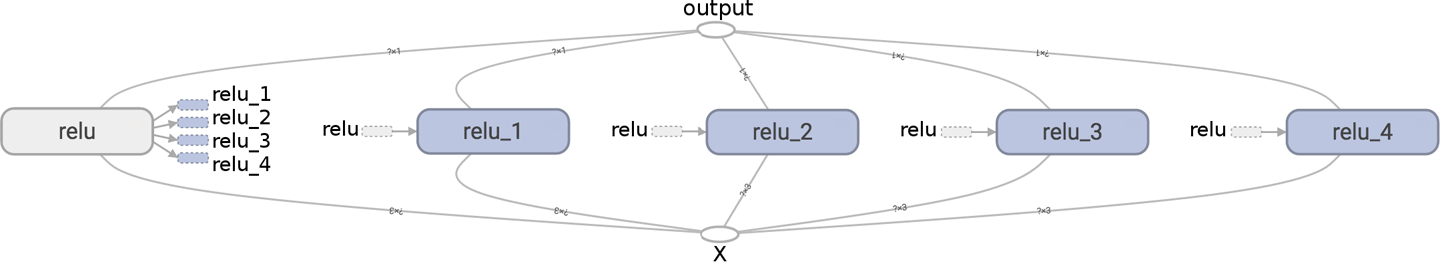

In [94]:
reset_graph()

def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
    w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
    w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
    b = tf.Variable(0.0, name="bias")                           # not shown
    z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = []
for relu_index in range(5):
    with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu9", tf.get_default_graph())
file_writer.close()

这是对TensorFlow的介绍。我们将通过以下章节讨论更高级的主题，特别是与深度神经网络，卷积神经网络相关的许多操作，和循环神经网络以及如何使用多线程，队列，多个GPU和多个服务器来扩展TensorFlow。

## Extra material

In [95]:
reset_graph()

with tf.variable_scope("my_scope"):
    x0 = tf.get_variable("x", shape=(), initializer=tf.constant_initializer(0.))
    x1 = tf.Variable(0., name="x")
    x2 = tf.Variable(0., name="x")

with tf.variable_scope("my_scope", reuse=True):
    x3 = tf.get_variable("x")
    x4 = tf.Variable(0., name="x")

with tf.variable_scope("", default_name="", reuse=True):
    x5 = tf.get_variable("my_scope/x")

print("x0:", x0.op.name)
print("x1:", x1.op.name)
print("x2:", x2.op.name)
print("x3:", x3.op.name)
print("x4:", x4.op.name)
print("x5:", x5.op.name)
print(x0 is x3 and x3 is x5)

x0: my_scope/x
x1: my_scope/x_1
x2: my_scope/x_2
x3: my_scope/x
x4: my_scope_1/x
x5: my_scope/x
True


* 第一个 variable_scope（）块首先创建名为 my_scope/x 的共享变量 x0。对于共享变量以外的所有操作（包括非共享变量），变量作用域的作用类似于常规名称作用域，这就是为什么两个变量 x1 和 x2 的名称都带有前缀 my_scope /的原因。但请注意，TensorFlow**通过添加索引使其名称唯一**：my_scope / x_1和my_scope / x_2。

* 第二个 variable_scope（）块重用my_scope范围内的共享变量，这就是 x0 为 x3 的原因。再一次，对于除共享变量之外的所有操作，它充当命名范围，并且因为它是与第一个独立的块，范围的名称由TensorFlow（my_scope_1）设置为唯一，因此变量 x4 名为my_scope_1/x。

* 第三个 variable_scope（） 块显示了通过在根作用域（其名称为空字符串）处创建 variable_scope（）来获取共享变量 my_scope/x 的句柄的另一种方法，然后使用共享变量的全名调用get_variable（）（即“my_scope / x”）。

## Strings

In [96]:
reset_graph()

text = np.array("Do you want some café?".split())
text_tensor = tf.constant(text)

with tf.Session() as sess:
    print(text_tensor.eval())

[b'Do' b'you' b'want' b'some' b'caf\xc3\xa9?']


## Autodiff

注意：autodiff内容已移至extra_autodiff.ipynb notebook

## Exercises

**1. to 11.**
[在这里](https://www.jianshu.com/p/5e230a4af77d)

**12. Logistic Regression with Mini-Batch Gradient Descent using TensorFlow**

思路要求：
* 在logistic_regression（）函数中定义可以轻松重用的图形。
* 在训练期间定期使用Saver保存检查点，并在训练结束时保存最终模型。
* 如果训练中断，则在启动时恢复最后一个检查点。
* 使用漂亮的范围定义图形，以使图形在TensorBoard中看起来很好。
* 添加摘要以显示TensorBoard中的学习曲线。
* 尝试调整一些超参数，例如学习率或小批量大小，并查看学习曲线的形状。

首先，让我们使用Scikit-Learn的make_moons（）函数创建卫星数据集：

In [97]:
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

我们来看看数据集：

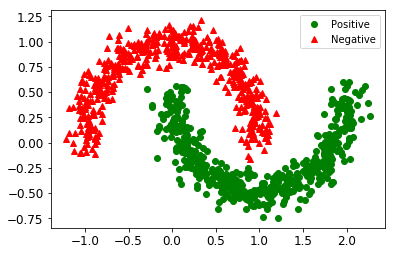

In [98]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend()
plt.show()

我们不要忘记为每个实例添加额外的偏差特征（$ x_0 = 1 $）。为此，我们只需要在输入矩阵$ X $的左边添加一个全是 1 的列：

In [99]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]

检查一下

In [100]:
X_moons_with_bias[:5]

array([[ 1.        , -0.05146968,  0.44419863],
       [ 1.        ,  1.03201691, -0.41974116],
       [ 1.        ,  0.86789186, -0.25482711],
       [ 1.        ,  0.288851  , -0.44866862],
       [ 1.        , -0.83343911,  0.53505665]])

看起来不错。 现在让我们**重新构造y_train以使其成为列向量**（即具有单列的2D数组）：

In [101]:
y_moons_column_vector = y_moons.reshape(-1, 1)

现在让我们将数据拆分为训练集和测试集：

In [102]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

好的，现在让我们创建一个小函数来生成训练批次。在这个实现中，我们将从每个批次的训练集中选择随机实例。这意味着单个批次可能多次包含相同的实例，并且单个epoch 也可能不涵盖所有训练实例（实际上它通常仅覆盖大约三分之二的实例）。但是，实际上这不是问题，同时它简化了代码：

In [103]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

让我们来察看其中一个small batch：

In [104]:
X_batch, y_batch = random_batch(X_train, y_train, 5)
X_batch

array([[ 1.        ,  1.93189866,  0.13158788],
       [ 1.        ,  1.07172763,  0.13482039],
       [ 1.        , -1.01148674, -0.04686381],
       [ 1.        ,  0.02201868,  0.19079139],
       [ 1.        , -0.98941204,  0.02473116]])

In [105]:
y_batch

array([[1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

现在数据已准备好提供给模型，我们需要构建该模型。 **让我们从一个简单的实现开始，然后我们将添加所有的bells and whistles**。

首先让我们重置默认图表。

In [106]:
reset_graph()

卫星数据集有两个输入特征，因为每个实例都是一个平面上的点（即二维）：

In [107]:
n_inputs = 2

现在让我们构建Logistic回归模型。正如我们在第4章中看到的，该模型首先计算输入的加权和（就像线性回归模型一样），然后它将sigmoid函数应用于结果，这给出了正类的估计概率：

$\hat{p} = h_\boldsymbol{\theta}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T \mathbf{x})$

回忆一下 $\boldsymbol{\theta}$是参数向量，包含偏差项 $\theta_0$和权重 $\theta_1, \theta_2, \dots, \theta_n$。 输入向量$\mathbf{x}$ 包含一个常量项 $x_0 = 1$，以及所有输入要素 $x_1, x_2, \dots, x_n$。

由于我们希望能够一次对多个实例进行预测，因此我们将使用输入矩阵$\mathbf{X}$ 而不是单个输入向量。 $i^{th}$ 行将包含 $i^{th}$ 输入向量 $(\mathbf{x}^{(i)})^T$ 的转置。 然后可以使用以下等式估计每个实例属于正类的概率：

$ \hat{\mathbf{p}} = \sigma(\mathbf{X} \boldsymbol{\theta})$

这就是构建模型所需的全部内容：

In [108]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = 1 / (1 + tf.exp(-logits))

事实上，TensorFlow有一个很好的函数tf.sigmoid（），我们可以用它来简化前面代码的最后一行：

In [109]:
y_proba = tf.sigmoid(logits)

正如我们在第4章中看到的，对数损失是用于Logistic回归的一个很好的成本函数：

$J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} \log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) \log\left(1 - \hat{p}^{(i)}\right)\right]}$

一种选择是自己实现它：

In [110]:
epsilon = 1e-7  # to avoid an overflow when computing the log
loss = -tf.reduce_mean(y * tf.log(y_proba + epsilon) + (1 - y) * tf.log(1 - y_proba + epsilon))

但我们不妨使用TensorFlow的：tf.losses.log_loss（）函数：

In [112]:
loss = tf.losses.log_loss(y, y_proba)  # uses epsilon = 1e-7 by default

其余的操作是非常标准的：让我们创建优化器并告诉它最小化成本函数：

In [113]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

我们现在需要的（在这个最小版本中）是变量初始化器：

In [114]:
init = tf.global_variables_initializer()

我们准备训练模型并将其用于预测！

这个代码真的没有什么特别之处，它与我们之前用于线性回归的代码几乎相同：

In [115]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Loss: 0.79260236
Epoch: 100 	Loss: 0.3434635
Epoch: 200 	Loss: 0.30754042
Epoch: 300 	Loss: 0.29288897
Epoch: 400 	Loss: 0.28533572
Epoch: 500 	Loss: 0.2804781
Epoch: 600 	Loss: 0.27808297
Epoch: 700 	Loss: 0.27615443
Epoch: 800 	Loss: 0.27551997
Epoch: 900 	Loss: 0.27491236


注意：我们在生成批次时不使用epoch number，因此我们可以只使用一个for循环而不是2个嵌套for循环，但是通过考虑 number of epochs（即，大致算法通过训练集的次数）来考虑训练时间是方便的

对于测试集中的每个实例，y_proba_val 根据模型包含它属于正类的估计概率。例如，以下是前5个估计概率：

In [116]:
y_proba_val[:5]

array([[0.54895616],
       [0.7072437 ],
       [0.51900256],
       [0.9911136 ],
       [0.50859046]], dtype=float32)

为了对每个实例进行分类，我们可以寻求最大可能性：将估计概率大于或等于0.5的任何实例分类为正数：

In [117]:
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

根据使用情况，您可能希望选择不同于0.5的阈值：
* 如果要获得高精度（但调用较低），请将其设置得更高;
* 如果需要高调用率（但精度较低），请将其降低。 

有关详细信息，请参阅第3章。

让我们计算模型的精度和召回率：

In [118]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.8627450980392157

In [119]:
recall_score(y_test, y_pred)

0.8888888888888888

让我们绘制这些预测，看看它们的样子：

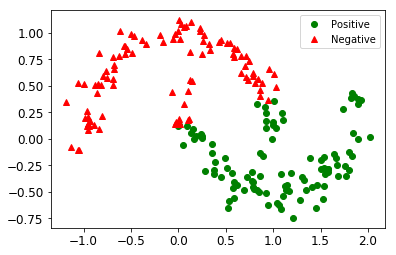

In [120]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

好吧，那看起来很糟糕。但是我们不要忘记Logistic回归模型具有线性决策边界，所以这实际上接近我们用这个模型做的最好的
（除非我们添加更多特征，我们将在稍后显示）。

现在让我们重新开始，但这次我们将添加所有的bells and whistles，如练习中所列：

* 在logistic_regression（）函数中定义可以轻松重用的图形。
* 在训练期间定期使用Saver保存检查点，并在训练结束时保存最终模型。
* 如果训练中断，则在启动时恢复最后一个检查点。
* 使用漂亮的范围定义图形，以使图形在TensorBoard中看起来很好。
* 添加摘要以显示TensorBoard中的学习曲线。
* 尝试调整一些超参数，例如学习率或小批量大小，并查看学习曲线的形状。

在开始之前，我们会在输入中添加4个特征： ${x_1}^2$, ${x_2}^2$, ${x_1}^3$ and ${x_2}^3$.。 这不是练习的一部分，但它将演示添加特征如何改进模型。 我们将手动执行此操作，但你也可以使用：**sklearn.preprocessing.PolynomialFeatures** 添加它们。

In [121]:
X_train_enhanced = np.c_[X_train,
                         np.square(X_train[:, 1]),
                         np.square(X_train[:, 2]),
                         X_train[:, 1] ** 3,
                         X_train[:, 2] ** 3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:, 1]),
                        np.square(X_test[:, 2]),
                        X_test[:, 1] ** 3,
                        X_test[:, 2] ** 3]

这就是“增强型”训练集的样子：

In [122]:
X_train_enhanced[:5]

array([[ 1.00000000e+00, -5.14696757e-02,  4.44198631e-01,
         2.64912752e-03,  1.97312424e-01, -1.36349734e-04,
         8.76459084e-02],
       [ 1.00000000e+00,  1.03201691e+00, -4.19741157e-01,
         1.06505890e+00,  1.76182639e-01,  1.09915879e+00,
        -7.39511049e-02],
       [ 1.00000000e+00,  8.67891864e-01, -2.54827114e-01,
         7.53236288e-01,  6.49368582e-02,  6.53727646e-01,
        -1.65476722e-02],
       [ 1.00000000e+00,  2.88850997e-01, -4.48668621e-01,
         8.34348982e-02,  2.01303531e-01,  2.41002535e-02,
        -9.03185778e-02],
       [ 1.00000000e+00, -8.33439108e-01,  5.35056649e-01,
         6.94620746e-01,  2.86285618e-01, -5.78924095e-01,
         1.53179024e-01]])

接下来让我们重置默认图表：

In [123]:
reset_graph()

现在让我们定义：**logistic_regression（）函数来创建图形**。我们将省略输入 X 和目标 y 的定义。 我们可以在这里包含它们，**但是将它们排除在外可以更容易地在各种情况中使用此函数**（例如，在将它们提供给Logistic回归模型之前，我们可能希望为输入添加一些预处理步骤）。

In [124]:
def logistic_regression(X, y, initializer=None, seed=42, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed=seed)
            theta = tf.Variable(initializer, name="theta")
            logits = tf.matmul(X, theta, name="logits")
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

让我们创建一个小函数来获取日志目录的名称以保存Tensorboard的摘要：

In [125]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

接下来，让我们：
* 使用logistic_regression（）函数创建图形。 
* 将创建FileWriter以将摘要保存到Tensorboard的日志目录中：

In [126]:
n_inputs = 2 + 4
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

最后我们可以训练模型了！ 我们将
* 首先检查先前的训练会话是否被中断，
* 如果是，我们将加载检查点并继续训练我们保存的epoch number。

在这个例子中，我们只是将epoch number保存到一个单独的文件中，但在第11章中我们将看到如何直接将训练步骤存储为模型的一部分，使用一个名为**global_step**的非训练变量，我们将其传递给优化器的minimize（）方法。

你可以尝试中断训练以确认它在您再次启动时确实恢复了最后一个检查点。

In [127]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

Epoch: 0 	Loss: 0.62998503
Epoch: 500 	Loss: 0.16122366
Epoch: 1000 	Loss: 0.11903212
Epoch: 1500 	Loss: 0.097329214
Epoch: 2000 	Loss: 0.083697945
Epoch: 2500 	Loss: 0.07437584
Epoch: 3000 	Loss: 0.067502156
Epoch: 3500 	Loss: 0.06220691
Epoch: 4000 	Loss: 0.058026787
Epoch: 4500 	Loss: 0.05456298
Epoch: 5000 	Loss: 0.051708277
Epoch: 5500 	Loss: 0.04923773
Epoch: 6000 	Loss: 0.047167283
Epoch: 6500 	Loss: 0.045376636
Epoch: 7000 	Loss: 0.043818742
Epoch: 7500 	Loss: 0.042374216
Epoch: 8000 	Loss: 0.041089155
Epoch: 8500 	Loss: 0.039970912
Epoch: 9000 	Loss: 0.038920246
Epoch: 9500 	Loss: 0.038010743
Epoch: 10000 	Loss: 0.0371557


再一次，我们可以通过将估计概率大于或等于0.5的所有实例分类为正数来进行预测：

In [128]:
y_pred = (y_proba_val >= 0.5)

In [129]:
precision_score(y_test, y_pred)

0.9797979797979798

In [130]:
recall_score(y_test, y_pred)

0.9797979797979798

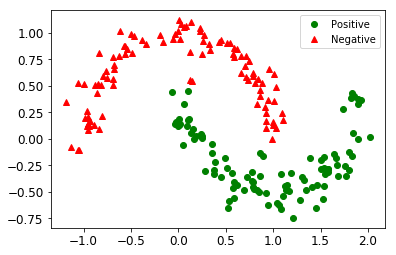

In [131]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

现在这好多了！ 显然，新特征确实帮了很多忙。

尝试启动tensorboard服务器，找到最新的运行并查看学习曲线（即，测试集上评估的损失如何随着epoch number的变化而变化）：

$ tensorboard --logdir = tf_logs

现在你可以使用超参数（例如batch_size或learning_rate）并一次又一次地运行训练，比较学习曲线。 你甚至可以通过实施**网格搜索或随机搜索**来自动执行此过程。 下面是一个随机搜索batch大小和学习率的简单实现。为简单起见，删除了检查点机制。

In [132]:
from scipy.stats import reciprocal

n_search_iterations = 10

for search_iteration in range(n_search_iterations):
    batch_size = np.random.randint(1, 100)
    learning_rate = reciprocal(0.0001, 0.1).rvs(random_state=search_iteration)

    n_inputs = 2 + 4
    logdir = log_dir("logreg")
    
    print("Iteration", search_iteration)
    print("  logdir:", logdir)
    print("  batch size:", batch_size)
    print("  learning_rate:", learning_rate)
    print("  training: ", end="")

    reset_graph()

    X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
    y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

    y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(
        X, y, learning_rate=learning_rate)

    file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

    n_epochs = 10001
    n_batches = int(np.ceil(m / batch_size))

    final_model_path = "./my_logreg_model_%d" % search_iteration

    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(n_epochs):
            for batch_index in range(n_batches):
                X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 500 == 0:
                print(".", end="")

        saver.save(sess, final_model_path)

        print()
        y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
        y_pred = (y_proba_val >= 0.5)
        
        print("  precision:", precision_score(y_test, y_pred))
        print("  recall:", recall_score(y_test, y_pred))

Iteration 0
  logdir: tf_logs/logreg-run-20181028091748/
  batch size: 54
  learning_rate: 0.004430375245218265
  training: .....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 1
  logdir: tf_logs/logreg-run-20181028092530/
  batch size: 22
  learning_rate: 0.0017826497151386947
  training: .....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 2
  logdir: tf_logs/logreg-run-20181028094401/
  batch size: 74
  learning_rate: 0.00203228544324115
  training: .....................
  precision: 0.9696969696969697
  recall: 0.9696969696969697
Iteration 3
  logdir: tf_logs/logreg-run-20181028094953/
  batch size: 58
  learning_rate: 0.004491523825137997
  training: .....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 4
  logdir: tf_logs/logreg-run-20181028095717/
  batch size: 61
  learning_rate: 0.07963234721775589
  training: .....................
  precision: 0.980198019801

SciPy统计模块的:reciprocal（）函数返回一个随机分布，当你不知道超参数的最佳比例时，该分布通常会被使用。 有关详细信息，请参阅第2章的练习题。